In [5]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.optimize import curve_fit

### Problem 1.

### a)

In [25]:
def f(theta):
    return 1/(3 + 2*np.cos(theta) + np.cos(2*theta))

In [26]:
def fill_matrix(n):
    A = np.ones((n, n))
    A = A*(-np.pi/n)
    np.fill_diagonal(A, [-np.pi-np.pi/n]*n)
    return A

In [27]:
def sigma_num(n):
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    A = fill_matrix(n)
    b = f(theta)
    sigma = np.linalg.solve(A, b)
    return(sigma)

In [28]:
def sigma_exact(n):
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    integral = integrate.quad(f, -np.pi, np.pi)[0]
    return -1/np.pi*(f(theta) + integral*(-1/4/np.pi))

<AxesSubplot: >

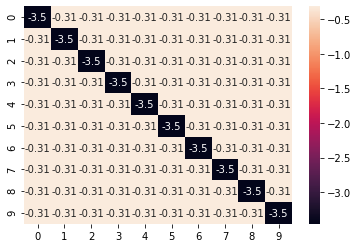

In [29]:
A = fill_matrix(10)
sbn.heatmap(A, annot=True)

In [30]:
n = 100
num = sigma_num(n)
m = 100
exact = sigma_exact(m)

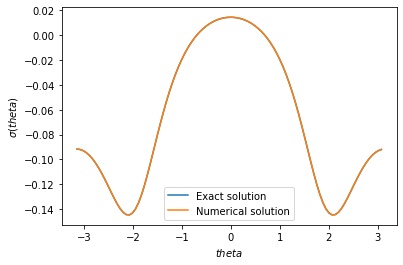

In [31]:
theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
theta_1 = np.linspace(-np.pi, np.pi, m+1)[:-1]
plt.plot(theta_1, exact, label = 'Exact solution')
plt.plot(theta, num, label = 'Numerical solution')
plt.xlabel('$theta$')
plt.ylabel('$\sigma (theta)$')
plt.legend()

### b)

In [32]:
error = []
for n in range(1, 50, 1):
    num = sigma_num(n)
    exact = sigma_exact(n)
    error.append(((((num-exact)**2).sum())**0.5)/n)

Text(0.5, 0, 'log(Number of points)')

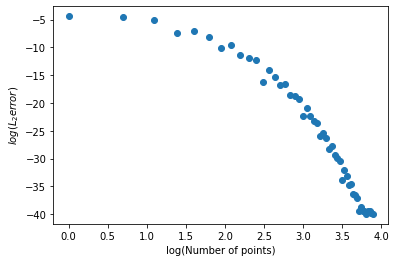

In [38]:
plt.scatter(np.log(range(1, 50, 1)), np.log(error[:]))
plt.ylabel('$log(L_2 error)$')
plt.xlabel('log(Number of points)')

### c)

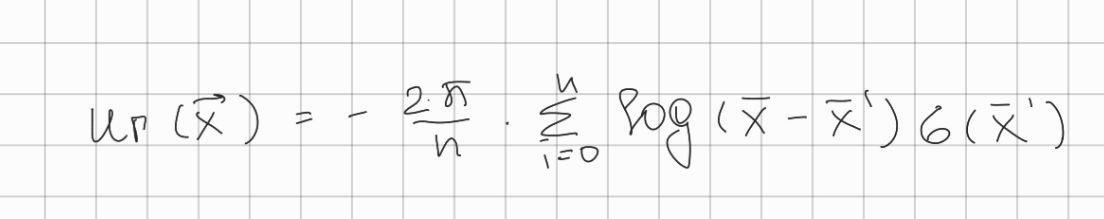

In [1]:
from IPython import display
display.Image("photo1670212180.jpeg")

It's not useful on the surface since it diverges.

In [338]:
def potential(x, y, n):
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    sigma= sigma_num(n)
    x_1 = np.cos(theta)
    y_1 = np.sin(theta)
    l = ((x-x_1)**2 + (y-y_1)**2)**0.5
    u = -2*np.pi/n*(sigma*np.log(l)).sum()
    return u

In [341]:
n = 100
theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
pot = []
for th in theta:
    x, y = 2*np.cos(th), 2*np.sin(th)
    pot.append(potential(x, y, 100))

Text(0.5, 0, 'theta')

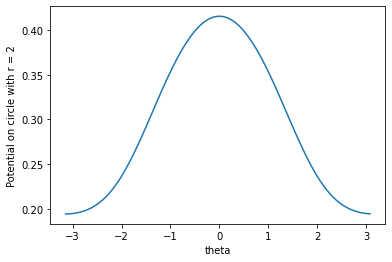

In [342]:
plt.plot(theta, pot)
plt.ylabel('Potential on circle with r = 2')
plt.xlabel('theta')

### d)

In [13]:
def new_f(x, y):
    normal = np.array([x/(x**2 + y**2)**0.5, y/(x**2 + y**2)**0.5])
    der = np.array([x/(x**2 + (y+0.5)**2) - x/(x**2 + (y-0.5)**2), 
                    (y+0.5)/(x**2 + (y+0.5)**2) - (y-0.5)/(x**2 + (y-0.5)**2)])
    return((der*normal).sum(0))

In [16]:
def sigma_num_1(n):
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    x, y = np.cos(theta), np.sin(theta)
    A = fill_matrix(n)
    b = new_f(x, y)
    sigma = np.linalg.solve(A, b)
    return(sigma)

In [14]:
def potential_1(x, y, n):
    sigma= sigma_num_1(n)
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    x_1 = np.cos(theta)
    y_1 = np.sin(theta)
    l = ((x-x_1)**2 + (y-y_1)**2)**0.5
    #print(np.log(l))
    u = (-2*np.pi/n*sigma*np.log(l)).sum()
    return u

In [15]:
def potential_2(x, y):
    return np.log((x**2 + (y + 1/2)**2)**0.5) - np.log((x**2 + (y - 1/2)**2)**0.5)

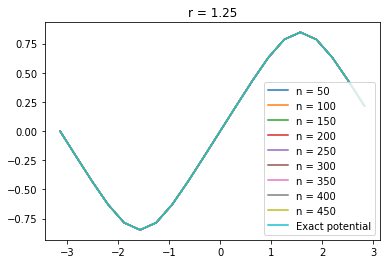

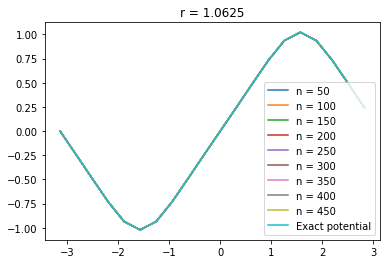

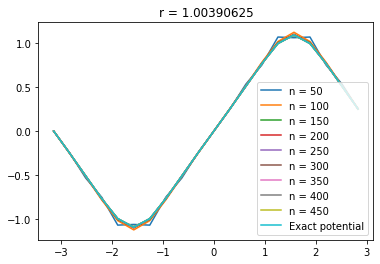

In [399]:
m = 20
theta = np.linspace(-np.pi, np.pi, m+1)[:-1]
error = []
for r in [1+1/4, 1+1/16, 1+1/256]:
    for n in range(10, 500, 10):
        pot_1 = []
        pot_2 = []
        for th in theta:
            x, y = r*np.cos(th), r*np.sin(th)
            pot_1.append(potential_1(x, y, n))
            pot_2.append(potential_2(x, y))
        if n == 490:
            plt.plot(theta, pot_2, label = 'Exact potential')
            plt.legend()
        plt.title('r = {}'.format(r))
        if n % 50 == 0:
            plt.plot(theta, pot_1, label = 'n = {}'.format(n))
            plt.legend()
        error.append((((np.array(pot_2)-np.array(pot_1))**2).sum())**0.5/m)   
    plt.show()

In [355]:
def linear(x, a, b):
    return a*x + b

NameError: name 'linear' is not defined

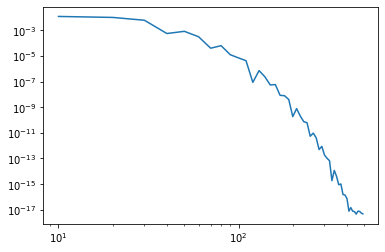

In [39]:
n = np.arange(10, 500, 10)
r = [1+1/4, 1+1/16, 1+1/256]
plt.loglog(n, error[:len(n)], label = 'r = {}'.format(r[0]))
a = 35
b = 3
p = curve_fit(linear, n[b:-a], np.log(error[b:len(n)-a]))[0]
plt.plot(n[b:-a], linear(n[b:-a], *p))        
plt.plot(n, np.log(error[len(n):2*len(n)]), label = 'r = {}'.format(r[1]))
a = 2
b = 6
p = curve_fit(linear, n[b:-a], np.log(error[b+len(n):2*len(n)-a]))[0]
plt.plot(n[b:-a], linear(n[b:-a], *p))        
plt.plot(n, np.log(error[2*len(n):]), label = 'r = {}'.format(r[2]))
a = 1
b = 10
p = curve_fit(linear, n[b:-a], np.log(error[b+2*len(n):-a]))[0]
plt.plot(n[b:-a], linear(n[b:-a], *p)) 
plt.xlabel('Number of points')
plt.ylabel('log($L_2 error$)')
plt.legend()

### Problem 2. a)

The matrix becomes singular. To check if u is the solution it has to satisfy the condition that there is no source inside, therefore the total flux through the boundary is zero. 

In [377]:
def fill_matrix_inner(n):
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    x_1 = np.cos(theta)
    y_1 = np.sin(theta)
    x, y = 0.5, 0
    A = np.ones((n, n))
    A = A*(-np.pi/n)
    np.fill_diagonal(A, [+np.pi-np.pi/n]*n)
    A[0] = (-2*np.pi/n)*np.log(((x-x_1)**2 + (y-y_1)**2)**0.5)
    return A

-2.3738718216886214


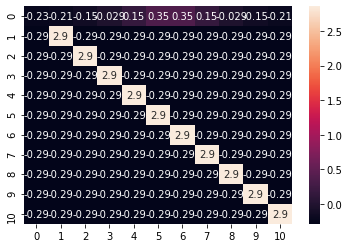

In [379]:
A = fill_matrix_inner(11)
sbn.heatmap(A, annot=True)
print(np.linalg.det(A))

### b)

In [380]:
def f_2(x, y):
    normal = np.array([x/(x**2 + y**2)**0.5, y/(x**2 + y**2)**0.5])
    der = np.array([x/(x**2 + (y+2)**2) - x/(x**2 + (y-2)**2), 
                    (y+2)/(x**2 + (y+2)**2) - (y-2)/(x**2 + (y-2)**2)])
    return((der*normal).sum(0))

In [381]:
def sigma_num_2(n):
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    x, y = np.cos(theta), np.sin(theta)
    A = fill_matrix_inner(n)
    b = f_2(x, y)
    b[0] = potential_inner_2(0.5, 0)
    sigma = np.linalg.solve(A, b)
    return(sigma)

In [382]:
def potential_inner(x, y, n):
    sigma= sigma_num_2(n)
    theta = np.linspace(-np.pi, np.pi, n+1)[:-1]
    x_1 = np.cos(theta)
    y_1 = np.sin(theta)
    l = ((x-x_1)**2 + (y-y_1)**2)**0.5
    u = (-2*np.pi/n*sigma*np.log(l)).sum()
    return u

In [383]:
def potential_inner_2(x, y):
    return np.log((x**2 + (y + 2)**2)**0.5) - np.log((x**2 + (y - 2)**2)**0.5)

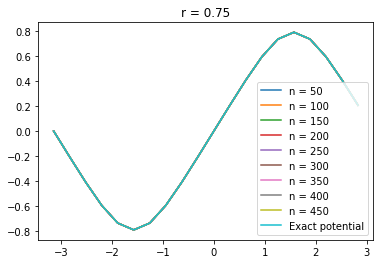

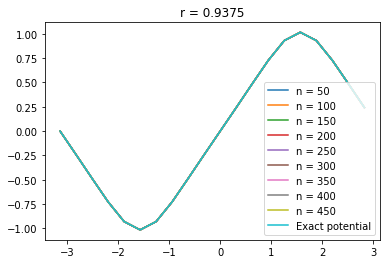

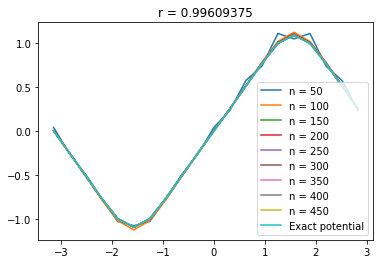

In [400]:
m = 20
theta = np.linspace(-np.pi, np.pi, m+1)[:-1]
error = []
for r in [1-1/4, 1-1/16, 1-1/256]:
    for n in range(10, 500, 10):
        pot_1 = []
        pot_2 = []
        for th in theta:
            x, y = r*np.cos(th), r*np.sin(th)
            pot_1.append(potential_inner(x, y, n))
            pot_2.append(potential_inner_2(x, y))
        if n == 490:
            plt.plot(theta, pot_2, label = 'Exact potential')
            plt.legend()
        plt.title('r = {}'.format(r))
        if n % 50 == 0:
            plt.plot(theta, pot_1, label = 'n = {}'.format(n))
            plt.legend()
        error.append((((np.array(pot_2)-np.array(pot_1))**2).sum())**0.5/m)   
    plt.show()

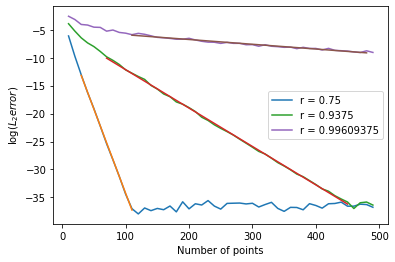

In [390]:
n = np.arange(10, 500, 10)
r = [1-1/4, 1-1/16, 1-1/256]
plt.loglog(n, error[:len(n)], label = 'r = {}'.format(r[0]))
a = 38
b = 2
# p = curve_fit(linear, n[b:-a], np.log(error[b:len(n)-a]))[0]
# plt.plot(n[b:-a], linear(n[b:-a], *p))        
plt.loglog(n, error[len(n):2*len(n)], label = 'r = {}'.format(r[1]))
a = 4
b = 6
# p = curve_fit(linear, n[b:-a], np.log(error[b+len(n):2*len(n)-a]))[0]
# plt.plot(n[b:-a], linear(n[b:-a], *p))        
plt.plot(n, np.log(error[2*len(n):]), label = 'r = {}'.format(r[2]))
a = 1
b = 10
p = curve_fit(linear, n[b:-a], np.log(error[b+2*len(n):-a]))[0]
plt.plot(n[b:-a], linear(n[b:-a], *p)) 
plt.xlabel('Number of points')
plt.ylabel('log($L_2 error$)')
plt.legend()

### Problem 3.

### a)
x = $2 \cdot cos(\theta)$ <br>
y = $sin(\theta)$

### b)

In [158]:
# from IPython import display
# display.Image("photo1670374318.jpeg")

### c)

In [237]:
a = 2
b = 1

In [236]:
def J(theta):
    return np.sqrt(a**2*np.sin(theta)**2 + b**2*np.cos(theta)**2)

In [255]:
def new_f_ellipse(x, y):
    normal = np.array([x/a**2/(x**2/a**4 + y**2/b**4)**0.5, y/b**2/(x**2/a**4 + y**2/b**4)**0.5])
    der = np.array([x/(x**2 + (y+0.5)**2) - x/(x**2 + (y-0.5)**2), 
                    (y+0.5)/(x**2 + (y+0.5)**2) - (y-0.5)/(x**2 + (y-0.5)**2)])
    return((der*normal).sum(0))

In [297]:
def fill_matrix_ellipse(n):
    theta = np.linspace(0, 2*np.pi, n+1)[:-1]
    x, y = a*np.cos(theta), b*np.sin(theta)
    normal = np.array([x/a**2/(x**2/a**4 + y**2/b**4)**0.5, y/b**2/(x**2/a**4 + y**2/b**4)**0.5]).T
    J_val = J(theta)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i != j:
                #print((x[i]-x[j])*normal[0][j] + (y[i]-y[j])*normal[1][j])
                A[i][j] = (-2*np.pi/n)*np.dot([x[i] - x[j], y[i] - y[j]], normal[i])/((x[j]-x[i])**2 + (y[j]-y[i])**2)*J_val[j]
            else:
                A[i][j] = -np.pi -2*np.pi/n/J_val[j]**2
    return A

<AxesSubplot: >

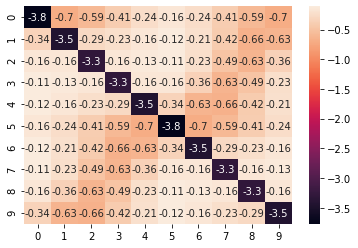

In [298]:
sbn.heatmap(fill_matrix_ellipse(10), annot = True)

In [299]:
def sigma_num_ellipse(n):
    theta = np.linspace(0, 2*np.pi, n+1)[:-1]
    x, y = 2*np.cos(theta), np.sin(theta)
    A = fill_matrix_ellipse(n)
    b = new_f_ellipse(x, y)
    sigma = np.linalg.solve(A, b)
    return(sigma)

In [300]:
sigma_num_ellipse(10)

array([ 4.96228930e-18, -9.33343300e-03,  1.32407366e-01,  1.32407366e-01,
       -9.33343300e-03, -2.79152370e-17,  9.33343300e-03, -1.32407366e-01,
       -1.32407366e-01,  9.33343300e-03])

In [301]:
def potential_ellipse(x, y, n):
    sigma= sigma_num_ellipse(n)
    theta = np.linspace(0, 2*np.pi, n+1)[:-1]
    J = (4*(np.sin(theta))**2 + (np.cos(theta))**2 )** 0.5
    x_1 = 2*np.cos(theta)
    y_1 = np.sin(theta)
    l = ((x-x_1)**2 + (y-y_1)**2)**0.5
    u = (-2*np.pi/n*sigma*np.log(l)*J).sum()
    #print(u)
    return u

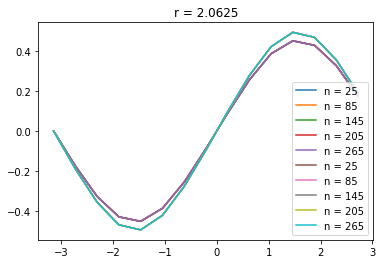

In [323]:
m = 15
theta = np.linspace(-np.pi, np.pi, m+1)[:-1]
error = []
for r in [2+1/4, 2+1/16]:
    for n in range(10, 300, 3):
        pot_1 = []
        pot_2 = []
        for th in theta:
            x, y = r*np.cos(th), r*np.sin(th)
            pot_1.append(potential_ellipse(x, y, n))
            pot_2.append(potential_2(x, y))
        if n == 195:
            plt.plot(theta, pot_2, label = 'Exact potential')
            plt.legend()
        plt.title('r = {}'.format(r))
        if n % 20 == 5:
            plt.plot(theta, pot_1, label = 'n = {}'.format(n))
            plt.legend()
        error.append(((np.max(np.abs(np.array(pot_2)-np.array(pot_1))))**0.5/m))   
    #plt.show()

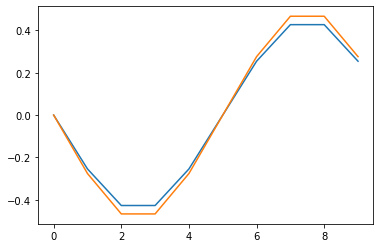

In [315]:
m = 10
theta = np.linspace(-np.pi, np.pi, m+1)[:-1]
for r in [2+1/4, 2+1/16]:
    n = 200
    pot_1 = []
    pot_2 = []
    for th in theta:
        x, y = r*np.cos(th), r*np.sin(th)
        #pot_1.append(potential_ellipse(x, y, n))
        pot_2.append(potential_2(x, y))
    plt.plot(pot_2)

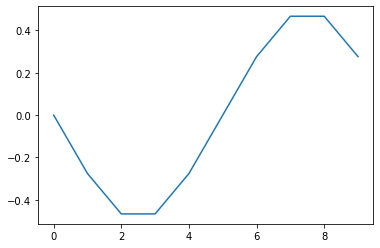

In [314]:
plt.plot(pot_2)

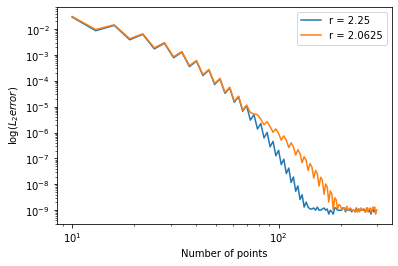

In [324]:
n = np.arange(10, 300, 3)
r = [2+1/4, 2+1/16]
plt.loglog(n, error[:len(n)], label = 'r = {}'.format(r[0]))
# a = 35
# b = 3
# p = curve_fit(linear, n[b:-a], np.log(error[b:len(n)-a]))[0]
# plt.plot(n[b:-a], linear(n[b:-a], *p))        
plt.loglog(n, error[len(n):2*len(n)], label = 'r = {}'.format(r[1]))
# a = 2
# b = 6
# p = curve_fit(linear, n[b:-a], np.log(error[b+len(n):2*len(n)-a]))[0]
# plt.plot(n[b:-a], linear(n[b:-a], *p))        
#plt.loglog(n, error[2*len(n):], label = 'r = {}'.format(r[2]))
# a = 1
# b = 10
# p = curve_fit(linear, n[b:-a], np.log(error[b+2*len(n):-a]))[0]
# plt.plot(n[b:-a], linear(n[b:-a], *p)) 
plt.xlabel('Number of points')
plt.ylabel('log($L_2 error$)')
plt.legend()